     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
48      -0.658345     1.479398     -1.283389    -1.315444
19      -0.900681     1.709595     -1.283389    -1.183812
103      0.553333    -0.362176      1.046945     0.790671
28      -0.779513     0.788808     -1.340227    -1.315444
86       1.038005     0.098217      0.535409     0.395774
GaussianMixture(n_components=3)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Accuracy Score
0.36666666666666664
confusion Matrix GMM
[[50  0  0]
 [ 0  5 45]
 [ 0 50  0]]


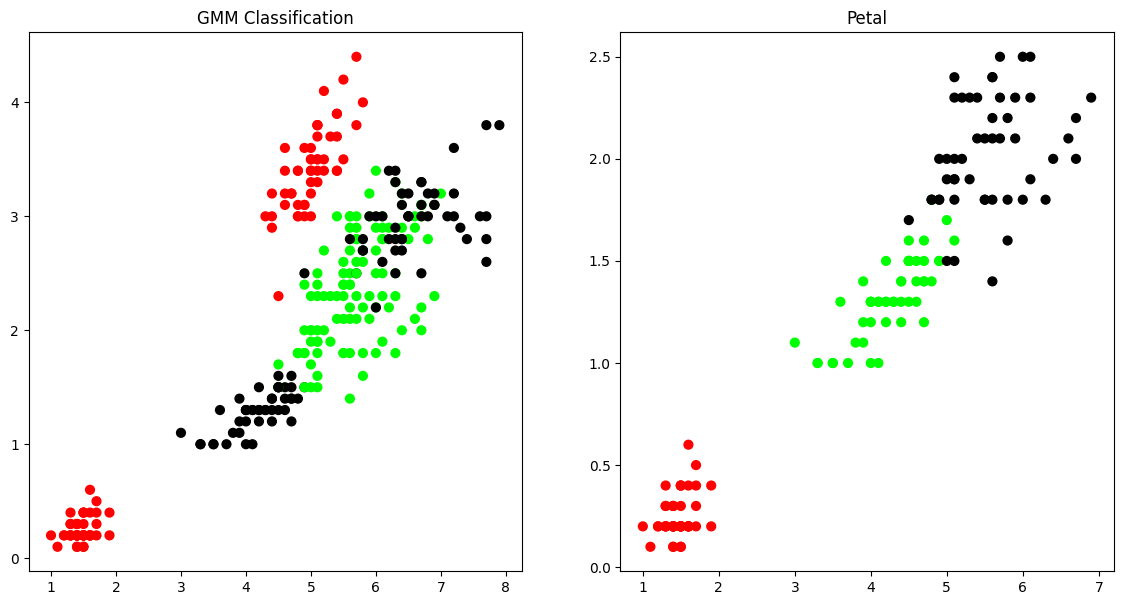

In [1]:
#program 9 : Demonstrate the working of EM algorithm to cluster a set of data stored in a .CSV file.
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn.metrics as sm
import pandas as pd
import numpy as np


# import some data to play with
iris = datasets.load_iris()

# Store the inputs as a Pandas Dataframe and set the column names
X = pd.DataFrame(iris.data)

#print(X)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
#print(X.columns)
#print("X:",x)
#print("Y:",y)    
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(X.Sepal_Length,X.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('Sepal')
 
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Petal')

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
xs.sample(5)
print (xs.sample(5))
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
print (gmm.fit(xs))

y_cluster_gmm = gmm.predict(xs)
y_cluster_gmm
print(y_cluster_gmm)

plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_cluster_gmm], s=40)
plt.title('GMM Classification')

print('Accuracy Score')
print(sm.accuracy_score(y, y_cluster_gmm))
# Confusion Matrix
print('confusion Matrix GMM')
print(sm.confusion_matrix(y, y_cluster_gmm))